## Import dependencies

In [1]:
import pandas as pd
from sqlalchemy import create_engine 

## Extract data from Youtube Video csv.

In [2]:
filepath_youtube = 'youtube_video_data.csv'
youtube_df = pd.read_csv(filepath_youtube)

## Transform data by changing column name and drop null values.

In [3]:
youtube_df = youtube_df.rename(columns={"channelName":"artist"})
youtube_df = youtube_df.dropna(how="any")
# youtube_df

In [4]:
# Getting list of columns name
youtube_df.columns

Index(['artist', 'channelUrl', 'date', 'details', 'dislikes', 'duration', 'id',
       'likes', 'numberOfSubscribers', 'text', 'title', 'url', 'viewCount'],
      dtype='object')

## Grab columns of interest and sort viewCount column in descending order.

In [5]:
youtube_df_useful = youtube_df[["artist","url","date","likes","dislikes",
                                "numberOfSubscribers","viewCount"]]
youtube_df_useful = youtube_df_useful.sort_values(["viewCount"], ascending=False)
youtube_df_useful

,artist,url,date,likes,dislikes,numberOfSubscribers,viewCount
119,Ed Sheeran,https://www.youtube.com/watch?v=JGwWNGJdvx8,2017-01-30T00:00:00+00:00,25000000,1300000,46600000,5158342444
78,Maroon 5,https://www.youtube.com/watch?v=09R8_2nJtjg,2015-01-14T00:00:00+00:00,12000000,541000,33000000,3374599190
73,OneRepublic,https://www.youtube.com/watch?v=hT_nvWreIhg,2013-05-31T00:00:00+00:00,12000000,411000,9060000,3174427742
106,Taylor Swift,https://www.youtube.com/watch?v=nfWlot6h_JM,2014-08-18T00:00:00+00:00,10000000,1000000,41200000,3009912863
148,Major Lazer Official,https://www.youtube.com/watch?v=YqeW9_5kURI,2015-03-23T00:00:00+00:00,13000000,565000,13900000,2961408831
...,...,...,...,...,...,...,...
23,Gloriae Templum,https://www.youtube.com/watch?v=aw2J-77cSWk,2021-01-21T00:00:00+00:00,180,1,54200,2562
133,Music Collection 2021,https://www.youtube.com/watch?v=it-UytEfrTk,Invalid date,23,0,147000,2034
25,KDMR Music,https://www.youtube.com/watch?v=XgGO2572WFU,Invalid date,47,0,15200,304
116,16 WAPT News Jackson,https://www.youtube.com/watch?v=IyeEFQbTV3o,2021-01-21T00:00:00+00:00,2,0,23700,60


## Group by artist and sum the dataframe columns.
## Sort viewCount column in descending order.

In [6]:
clean_youtube_df = youtube_df_useful.groupby(["artist"])
clean_youtube_df = clean_youtube_df.sum()
clean_youtube_df = clean_youtube_df.sort_values(["viewCount"], ascending=False)
clean_youtube_df.to_csv('where_is_the_weekend.csv')

In [7]:
#check values
clean_youtube_df.head(50)

,likes,dislikes,numberOfSubscribers,viewCount
artist,,,,
Ed Sheeran,39000000,1840000,93200000,7870380452
Maroon 5,30000000,1290000,66000000,6318163911
Taylor Swift,21200000,1638000,164800000,4549446267
Justin Bieber,26200000,11543000,181500000,4079494508
OneRepublic,12000000,411000,9060000,3174427742
Marshmello,31900000,1072000,153000000,2973749183
Major Lazer Official,13000000,565000,13900000,2961408831
Dua Lipa,13000000,605000,16600000,2333303405
Christina Perri,10000000,265000,5720000,1758319890


## Extract data from the Chart2000 csv.

In [8]:
filepath_chart2000 = 'chart2000-song-2020-decade-0-3-0062.csv'
chart2000_df = pd.read_csv(filepath_chart2000)
chart2000_df

,decade,position,artist,song,indicativerevenue,us,uk,de,fr,ca,au
0,2020s,1,The Weeknd,Blinding Lights,37510.336493,1,1,1,1,1,1
1,2020s,2,Dua Lipa,Don't Start Now,23668.218900,2,3,10,12,3,2
2,2020s,3,Roddy Ricch,The Box,22136.450765,1,2,12,7,1,4
3,2020s,4,Post Malone,Circles,20267.825135,1,19,37,77,3,5
4,2020s,5,Harry Styles,Adore You,18182.966690,6,7,83,126,10,7
...,...,...,...,...,...,...,...,...,...,...,...
195,2020s,196,Bad Bunny,Vete,2497.555328,36,-,-,-,-,-
196,2020s,197,Jameson Rodgers,Some Girls,2496.423853,29,-,-,-,49,-
197,2020s,198,Kelly Clarkson,Underneath The Tree,2475.974530,12,15,14,-,9,-
198,2020s,199,Lil Uzi Vert,Futsal Shuffle 2020,2471.854931,5,91,-,-,8,-


## Transform data by selecting the columns of interest.
## Rename column to revenue.

In [9]:
top_artist = chart2000_df[["artist","indicativerevenue"]]
top_artist = top_artist.rename(columns={"indicativerevenue":"revenue"})
top_artist

,artist,revenue
0,The Weeknd,37510.336493
1,Dua Lipa,23668.218900
2,Roddy Ricch,22136.450765
3,Post Malone,20267.825135
4,Harry Styles,18182.966690
...,...,...
195,Bad Bunny,2497.555328
196,Jameson Rodgers,2496.423853
197,Kelly Clarkson,2475.974530
198,Lil Uzi Vert,2471.854931


## Group by artist and sum the dataframe columns.
## Sort the revenue column in descending order.

In [10]:
clean_top_artist_df = top_artist.groupby(["artist"])
clean_top_artist_df = clean_top_artist_df.sum()
clean_top_artist_df = clean_top_artist_df.sort_values(["revenue"], ascending=False)
clean_top_artist_df.to_csv('artist_revenue.csv')
clean_top_artist_df

,revenue
artist,
The Weeknd,52032.639312
Dua Lipa,39827.024005
Harry Styles,33635.908394
Lewis Capaldi,31878.429494
Billie Eilish,26537.254173
...,...
Demi Lovato,2517.435332
Travis Denning,2517.068977
Jameson Rodgers,2496.423853


## Merge both dataframe with artist column.

In [11]:
merge_df = pd.merge(clean_top_artist_df, clean_youtube_df, on='artist', how="inner")
merge_df

,revenue,likes,dislikes,numberOfSubscribers,viewCount
artist,,,,,
The Weeknd,52032.639312,7100000,172000,44800000,414766020
Dua Lipa,39827.024005,13000000,605000,16600000,2333303405
Billie Eilish,26537.254173,6500000,161000,75800000,119184378
Roddy Ricch,22136.450765,5400000,129000,5200000,291148274
Post Malone,20267.825135,11400000,378000,41600000,1575998250
Maroon 5,14394.083924,30000000,1290000,66000000,6318163911
Drake,10497.953080,2800000,92000,23700000,224054798
Ariana Grande,9819.459861,24100000,814000,185600000,1088740342
Ava Max,9371.065786,5030000,111000,12660000,396482476


## Add and calculate the revenue per view.
## Sort the data by revenue per view.

In [12]:
revenue_per_view = merge_df["revenue"]/merge_df["viewCount"]
merge_df["revenue_per_view"] = revenue_per_view
merge_df.sort_values(["revenue_per_view"], ascending=False)

,revenue,likes,dislikes,numberOfSubscribers,viewCount,revenue_per_view
artist,,,,,,
Billie Eilish,26537.254173,6500000,161000,75800000,119184378,2.226572e-04
The Weeknd,52032.639312,7100000,172000,44800000,414766020,1.254506e-04
Roddy Ricch,22136.450765,5400000,129000,5200000,291148274,7.603154e-05
Juice WRLD,8218.820151,1800000,33000,7750000,120898672,6.798106e-05
DaBaby,6169.623275,2100000,59000,7170000,112524216,5.482929e-05
Drake,10497.953080,2800000,92000,23700000,224054798,4.685440e-05
Jason Derulo,3823.209326,2201000,94000,29600000,152850866,2.501268e-05
Ava Max,9371.065786,5030000,111000,12660000,396482476,2.363551e-05
Dua Lipa,39827.024005,13000000,605000,16600000,2333303405,1.706894e-05


In [13]:
merge_df = merge_df.reset_index()
merge_df

,artist,revenue,likes,dislikes,numberOfSubscribers,viewCount,revenue_per_view
0,The Weeknd,52032.639312,7100000,172000,44800000,414766020,1.254506e-04
1,Dua Lipa,39827.024005,13000000,605000,16600000,2333303405,1.706894e-05
2,Billie Eilish,26537.254173,6500000,161000,75800000,119184378,2.226572e-04
3,Roddy Ricch,22136.450765,5400000,129000,5200000,291148274,7.603154e-05
4,Post Malone,20267.825135,11400000,378000,41600000,1575998250,1.286031e-05
5,Maroon 5,14394.083924,30000000,1290000,66000000,6318163911,2.278207e-06
6,Drake,10497.953080,2800000,92000,23700000,224054798,4.685440e-05
7,Ariana Grande,9819.459861,24100000,814000,185600000,1088740342,9.019102e-06
8,Ava Max,9371.065786,5030000,111000,12660000,396482476,2.363551e-05
9,Juice WRLD,8218.820151,1800000,33000,7750000,120898672,6.798106e-05


In [14]:
revenue_df = merge_df[["artist", "revenue", "viewCount", "revenue_per_view"]]
revenue_df = revenue_df.rename(columns={"viewCount": "viewcount"})
revenue_df

,artist,revenue,viewcount,revenue_per_view
0,The Weeknd,52032.639312,414766020,1.254506e-04
1,Dua Lipa,39827.024005,2333303405,1.706894e-05
2,Billie Eilish,26537.254173,119184378,2.226572e-04
3,Roddy Ricch,22136.450765,291148274,7.603154e-05
4,Post Malone,20267.825135,1575998250,1.286031e-05
5,Maroon 5,14394.083924,6318163911,2.278207e-06
6,Drake,10497.953080,224054798,4.685440e-05
7,Ariana Grande,9819.459861,1088740342,9.019102e-06
8,Ava Max,9371.065786,396482476,2.363551e-05
9,Juice WRLD,8218.820151,120898672,6.798106e-05


In [15]:
stats_df = merge_df[["artist", "likes", "dislikes", "numberOfSubscribers"]]
stats_df = stats_df.rename(columns={"numberOfSubscribers": "numberofsubscribers"})
stats_df

,artist,likes,dislikes,numberofsubscribers
0,The Weeknd,7100000,172000,44800000
1,Dua Lipa,13000000,605000,16600000
2,Billie Eilish,6500000,161000,75800000
3,Roddy Ricch,5400000,129000,5200000
4,Post Malone,11400000,378000,41600000
5,Maroon 5,30000000,1290000,66000000
6,Drake,2800000,92000,23700000
7,Ariana Grande,24100000,814000,185600000
8,Ava Max,5030000,111000,12660000
9,Juice WRLD,1800000,33000,7750000


## Voila!

## Create database connection.

In [16]:
connection_string = "postgres:postgres@localhost:5432/artist_db"
engine = create_engine(f'postgresql://{connection_string}')

## Check tables added to Postgres SQL

In [17]:
engine.table_names()

['revenue', 'stats']

## Load DataFrames into database Artist

In [18]:
revenue_df.to_sql(name='revenue', con=engine, if_exists='append', index=False)

In [19]:
stats_df.to_sql(name='stats', con=engine, if_exists='append', index=False)

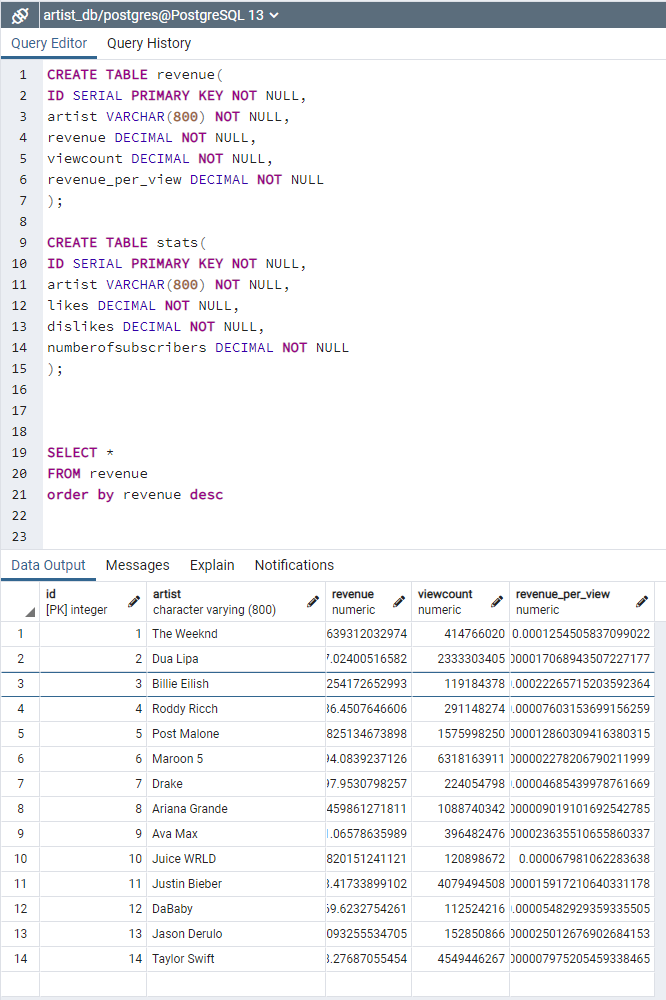

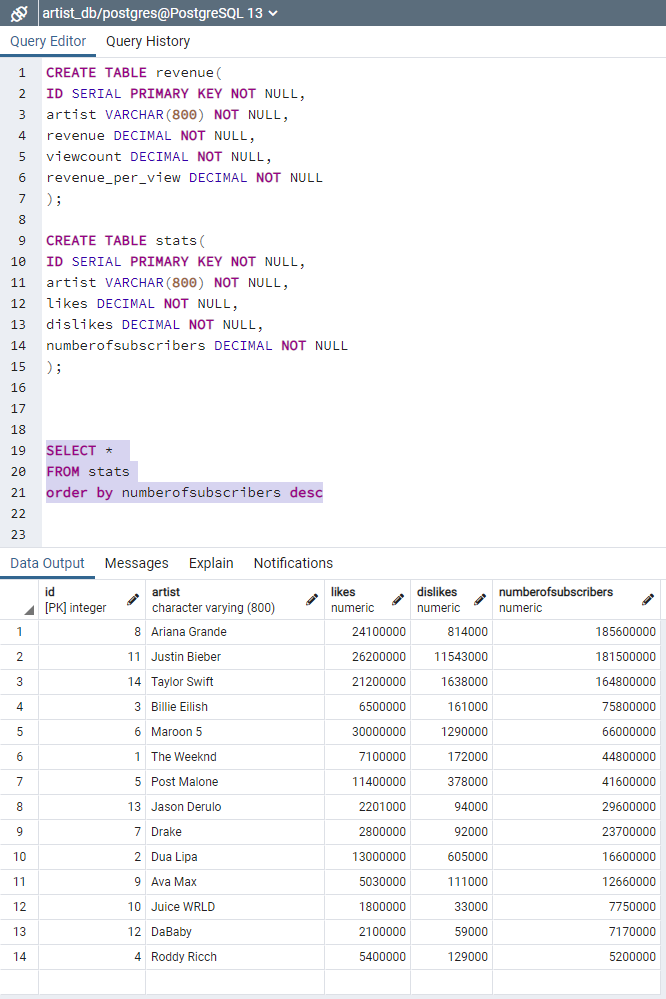

## Fin